In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [2]:
class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_layer_size = hidden_layer_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        # i/p to hidden layer
        self.w1 = np.random.randn(self.input_size, self.hidden_layer_size) * np.sqrt(2.0 / self.input_size)
        self.b1 = np.zeros((1, self.hidden_layer_size))
        # hidden to o/p
        self.w2 = np.random.randn(self.hidden_layer_size, self.output_size) * np.sqrt(2.0 / self.hidden_layer_size)
        self.b2 = np.zeros((1, self.output_size))

    def activation_relu(self, x):
        return np.maximum(0, x)

    def del_relu(self, x):
        return (x > 0).astype(float)

    def activation_softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward_prop(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = self.activation_relu(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.activation_softmax(self.z2)
        return self.a2

    def backward_prop(self, X, y, res):
        self.del_2 = res - y
        self.error_hidden_layer = np.dot(self.del_2, self.w2.T)
        self.del_1 = self.error_hidden_layer * self.del_relu(self.z1)

        grad_w2 = self.learning_rate * np.dot(self.a1.T, self.del_2)
        grad_b2 = self.learning_rate * np.sum(self.del_2, axis=0, keepdims=True)
        grad_w1 = self.learning_rate * np.dot(X.T, self.del_1)
        grad_b1 = self.learning_rate * np.sum(self.del_1, axis=0, keepdims=True)

        self.w2 -= grad_w2
        self.b2 -= grad_b2
        self.w1 -= grad_w1
        self.b1 -= grad_b1

    def train_nn(self, X, y):
        epochs = 500
        X = X.astype(np.float32)
        y = y.astype(np.float32)
        accuracies=[]
        for i in range(epochs):
            res = self.forward_prop(X)
            self.backward_prop(X, y, res)
            loss = self.cross_entropy_loss(res, y)
            accuracies.append(loss)
            
            if i % 10 == 0:
               
                print(f"Epoch {i} ===> Loss: {loss}")
        return accuracies
    def cross_entropy_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    def predict(self, X):
        X = X.astype(np.float32)
        res = self.forward_prop(X)
        return np.argmax(res, axis=1)

In [3]:
data = fetch_openml('mnist_784', version=1)

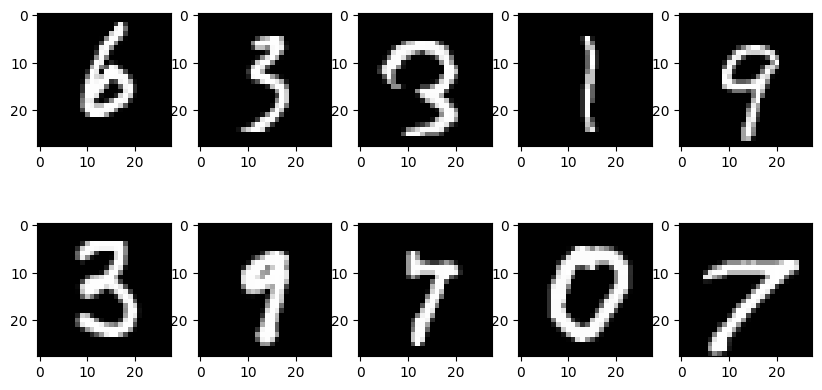

In [4]:

x, y = data["data"], data['target'].astype(np.uint8)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=10000, random_state=22)
X_train,X_test=np.array(X_train),np.array(X_test)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i+1].reshape(28,28),cmap="gray")
plt.show()

In [5]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Y_train_onehot_encoded = np.eye(10)[Y_train]

Model = MLP(input_size=784, hidden_layer_size=128, output_size=10, learning_rate=0.00001)
accuracies_tarining=Model.train_nn(X_train, Y_train_onehot_encoded)

Y_predict = Model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_predict)
print("Accuracy is:", accuracy)

Epoch 0 ===> Loss: 3.1723097644645826
Epoch 10 ===> Loss: 0.36705355732874956
Epoch 20 ===> Loss: 0.27834709248130335
Epoch 30 ===> Loss: 0.2371239120380177
Epoch 40 ===> Loss: 0.21038628428126682
Epoch 50 ===> Loss: 0.19089317094019442
Epoch 60 ===> Loss: 0.17564440639859918
Epoch 70 ===> Loss: 0.16322413935163693
Epoch 80 ===> Loss: 0.15280834862361403
Epoch 90 ===> Loss: 0.14387454869525693
Epoch 100 ===> Loss: 0.13608539087998278
Epoch 110 ===> Loss: 0.12920325369143176
Epoch 120 ===> Loss: 0.12307900919796448
Epoch 130 ===> Loss: 0.117557860365597
Epoch 140 ===> Loss: 0.11254496018151917
Epoch 150 ===> Loss: 0.10797045536463278
Epoch 160 ===> Loss: 0.10377565162804267
Epoch 170 ===> Loss: 0.09990001987625251
Epoch 180 ===> Loss: 0.09630421199228434
Epoch 190 ===> Loss: 0.09295606750180349
Epoch 200 ===> Loss: 0.08982320641932466
Epoch 210 ===> Loss: 0.08688957033839628
Epoch 220 ===> Loss: 0.08413862507298035
Epoch 230 ===> Loss: 0.08154388350024226
Epoch 240 ===> Loss: 0.07908999

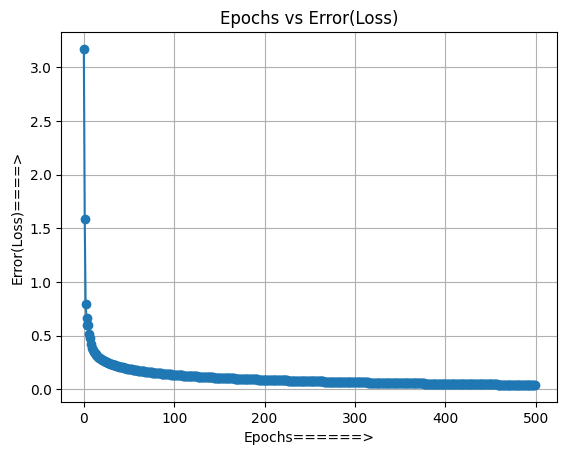

In [6]:
plt.plot(range(0, 500), accuracies_tarining, marker='o')
plt.xlabel("Epochs======>")
plt.ylabel("Error(Loss)====>")
plt.title("Epochs vs Error(Loss)")
plt.grid(True)
plt.show()

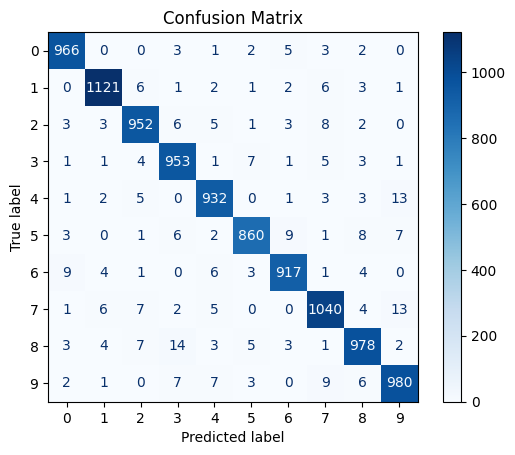

0.9699


In [7]:
Y_pred=Model.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print(np.trace(cm)/10000)